<h3><font color="#AA00BB">How you can use this Notebook</font></h3>
<p>This notebook was written to teach new concepts in data using Python.</p>
<p>You can read through the descriptions run the code (it should work!), or you may be taken through the code by one of our experts.</p>
<p>But one of the best habits to acquire is to re-write the code yourself.</p>
<ul><li>Experiment
<li>Break the code
<li>Build a deeper understanding of both the underlying data concepts and the code</ul>
<p>Don't worry if you make mistakes, we all do. The way to get better and make less mistakes is to write more code.</p>
<p>Enjoy!</p>
<p> - <i><font color="#AA00BB">Data Assembly team.</font></i></p>
<br>



# Pip Install

In [1]:
!pip install pandasql
!pip install sqlalchemy==1.4.46
!pip install sweetviz
!pip install lazypredict
!pip install yellowbrick
!pip install missingno

# **Logistic Regression**


Logistic regression is a statistical method for predicting binary outcomes. It's used when the dependent variable is categorical. The output of logistic regression is a probability that the given input point belongs to a certain class.

# Imports

In [2]:
import pandas as pd
from pandasql import sqldf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sweetviz as sv
import missingno as msno
import os
# from google.colab import drive
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use("fivethirtyeight")

In [ ]:
# mount drive
# drive.mount('/content/drive')
# change directory
# os.chdir('/content/drive/MyDrive/Data_Bootcamp')

In [5]:
# load data
df = pd.read_csv('diabetes.csv')

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Data Profiling + EDA

                                             |          | [  0%]   00:00 -> (? left)


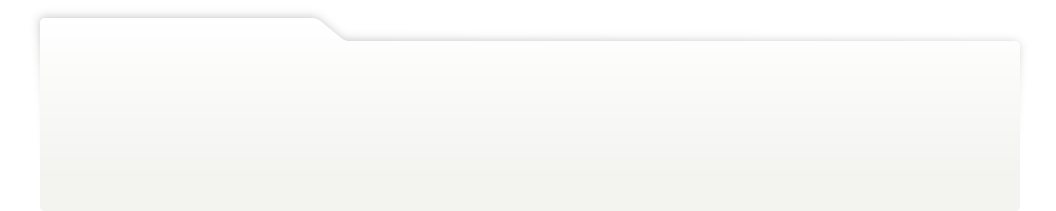
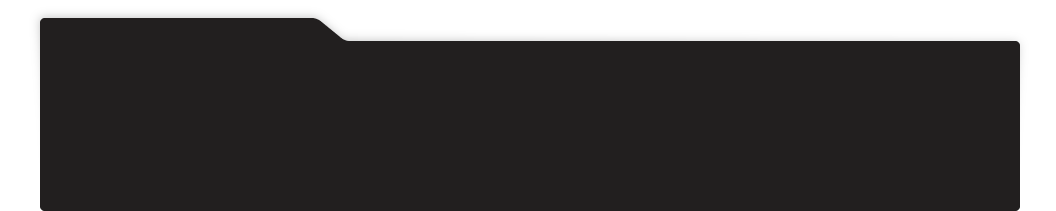
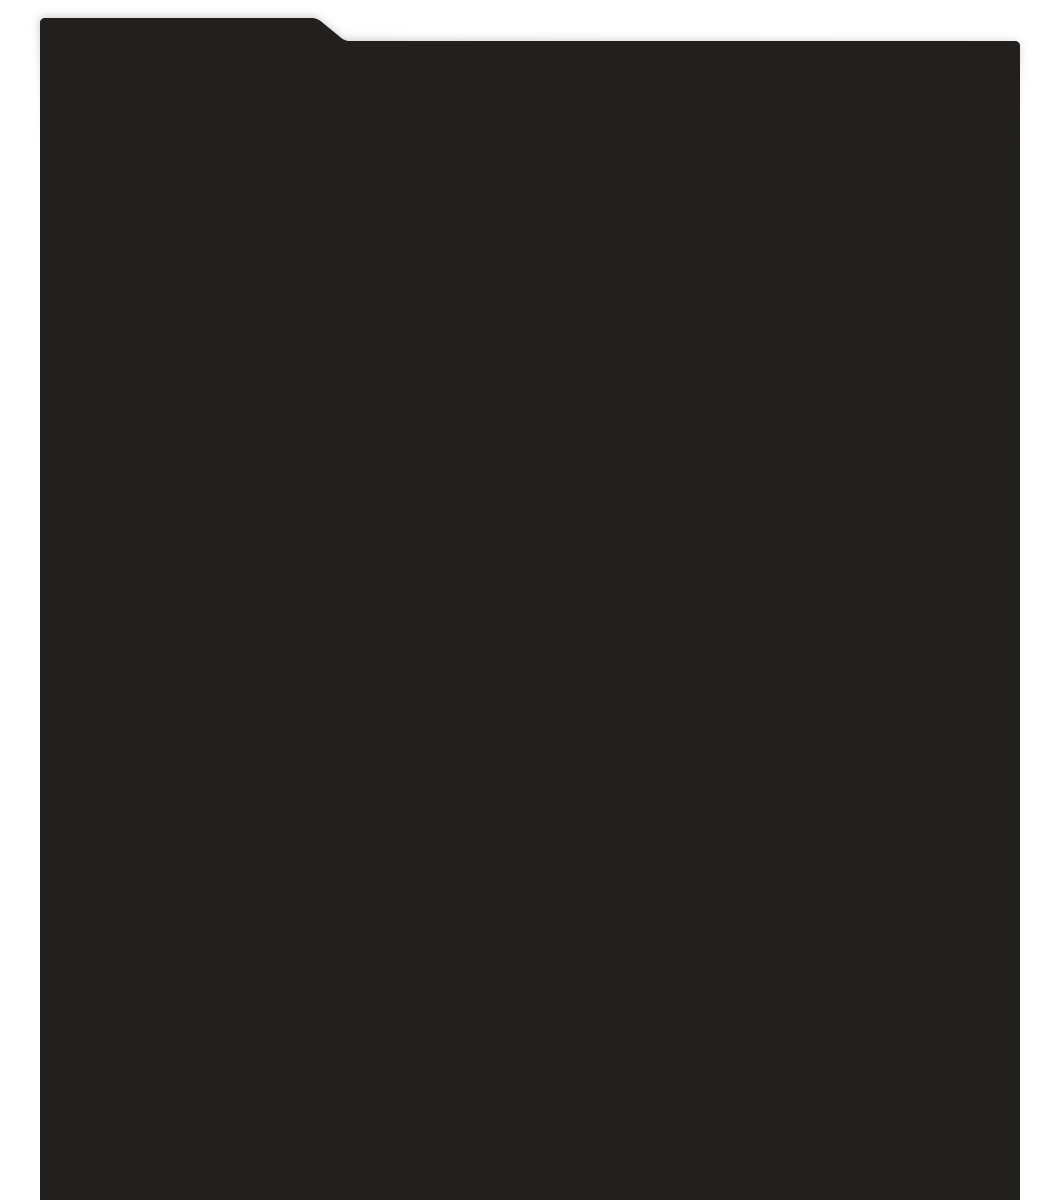
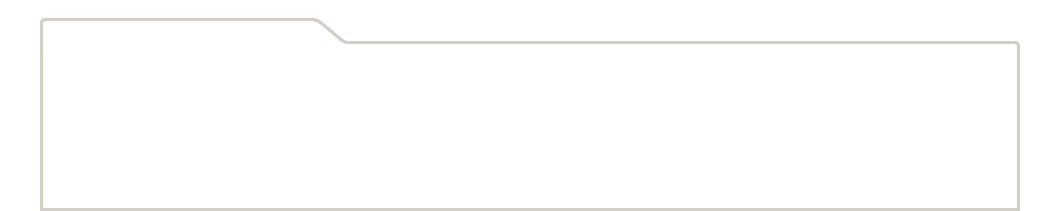
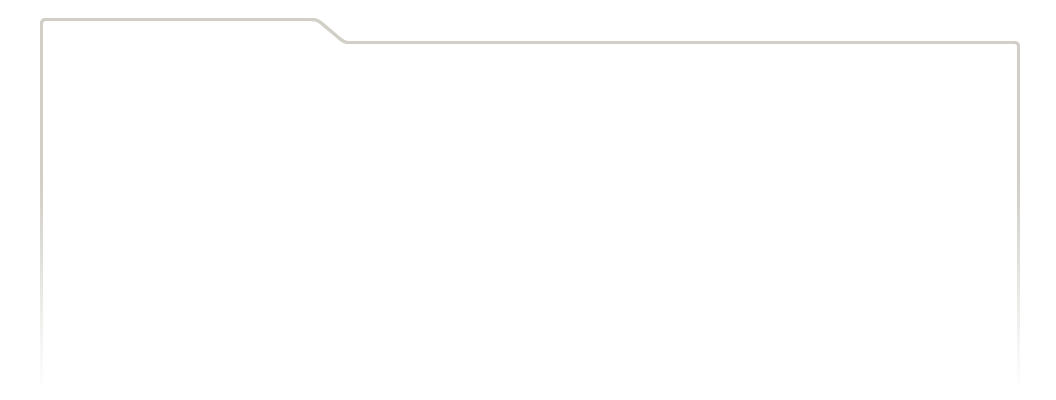
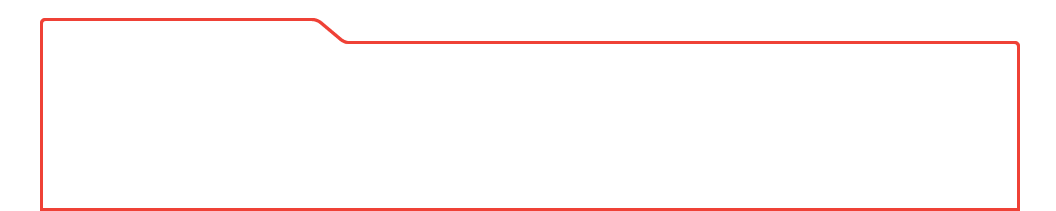
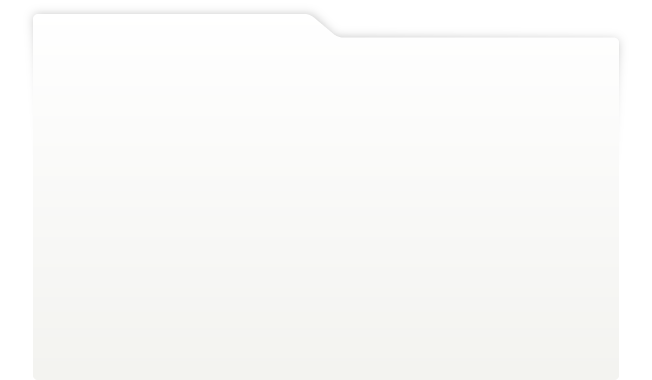
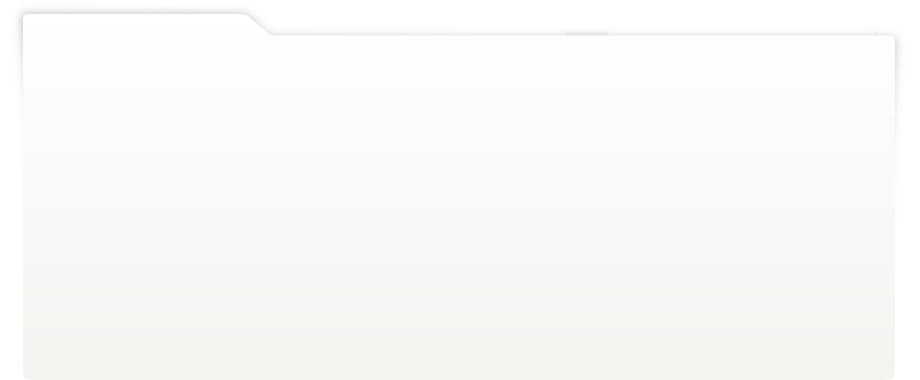
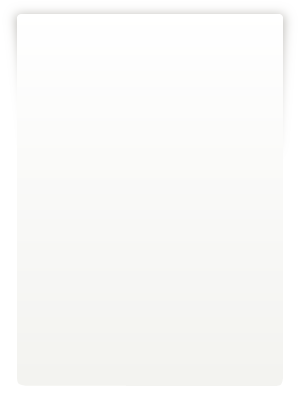
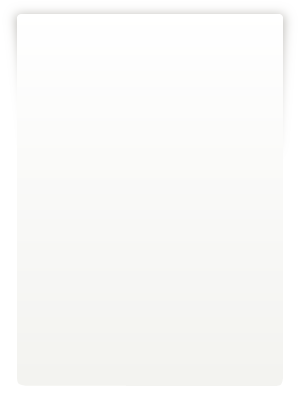
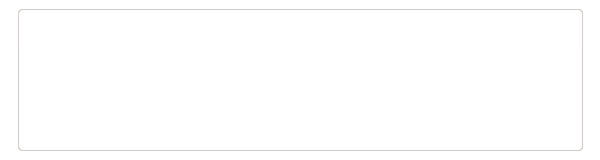
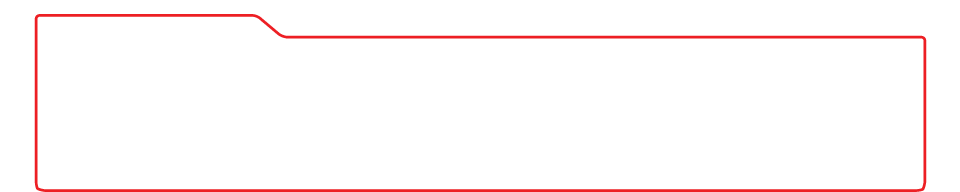
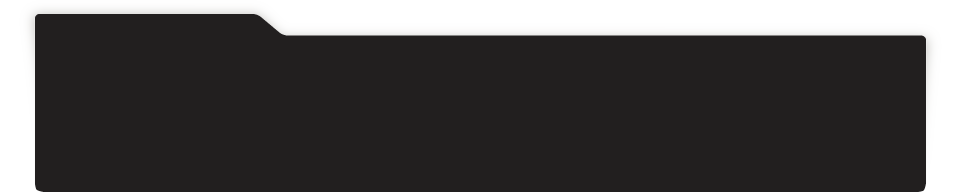
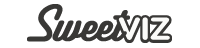
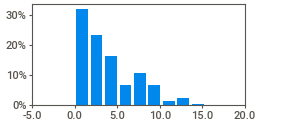
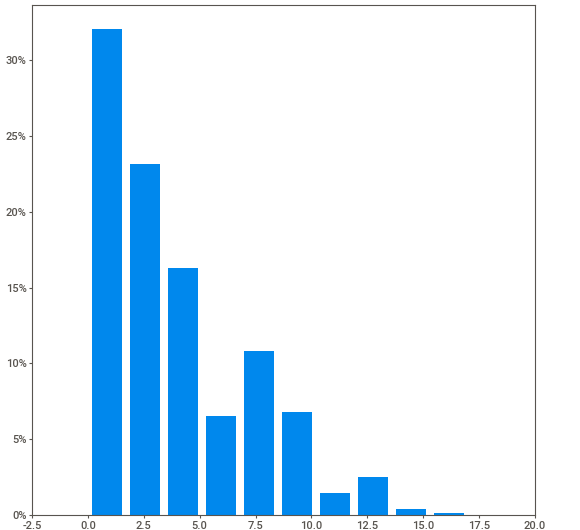
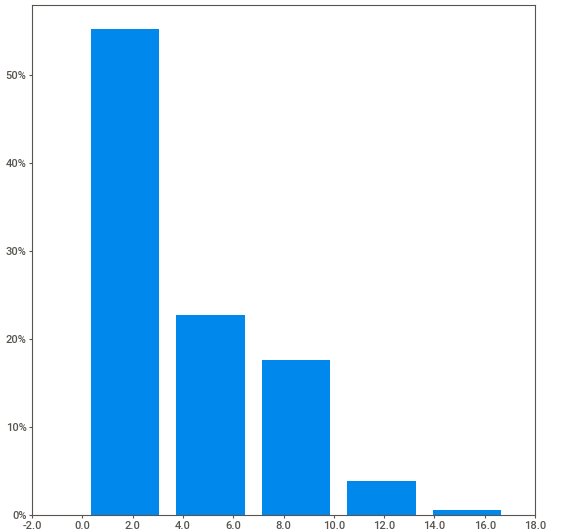
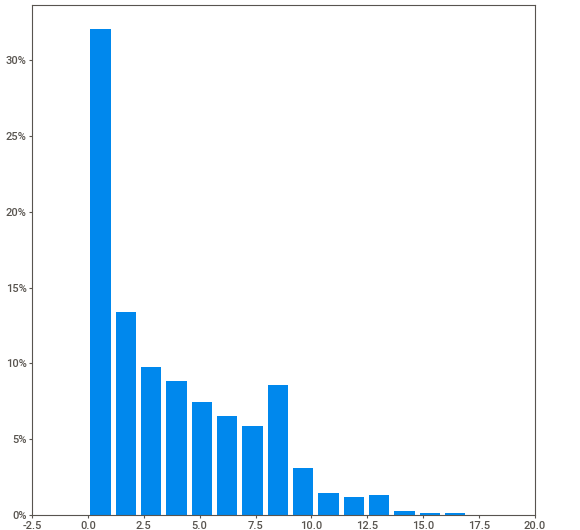
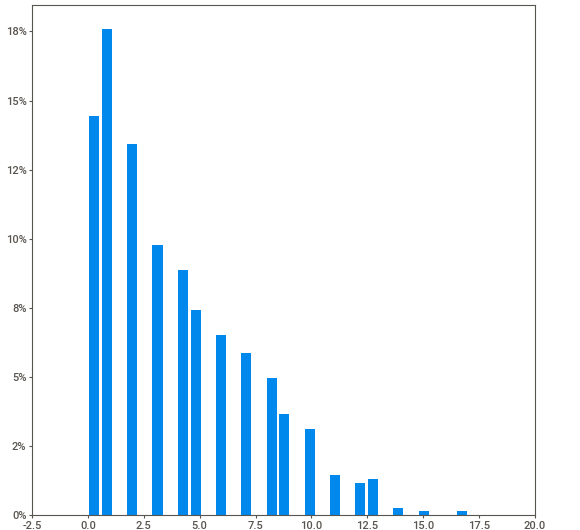
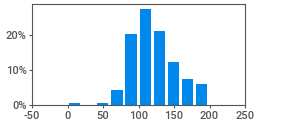
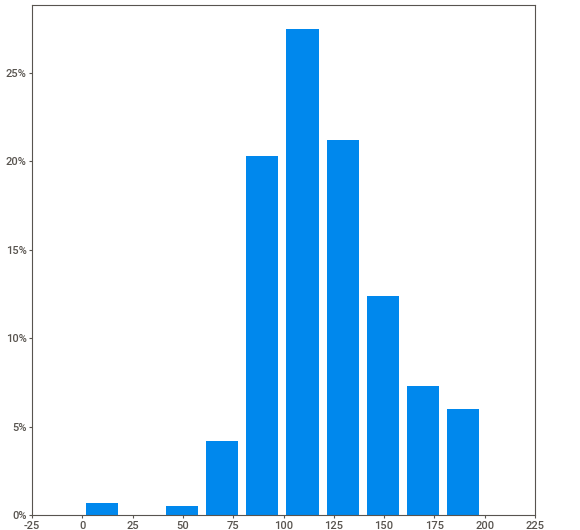
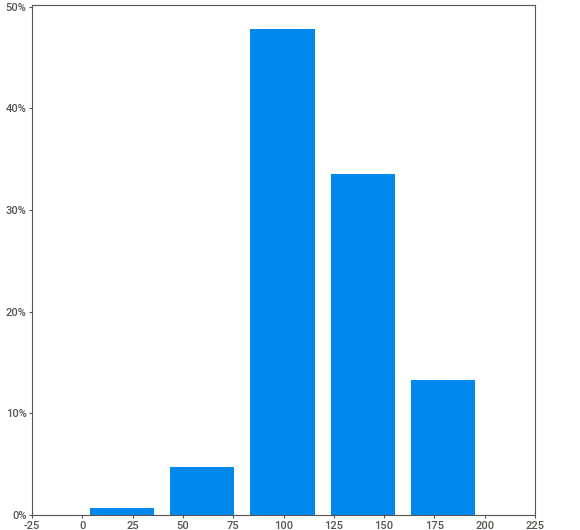
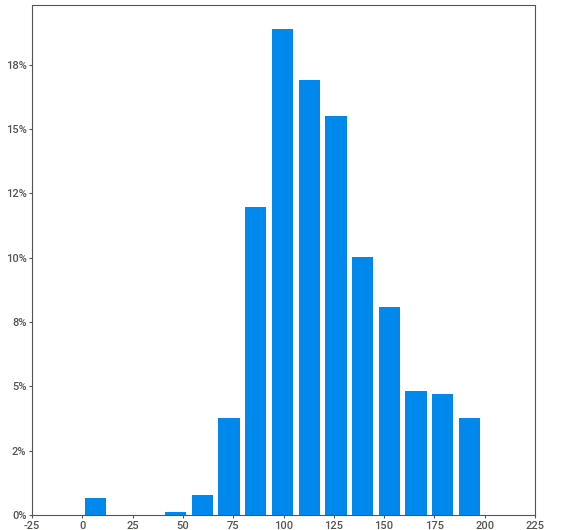
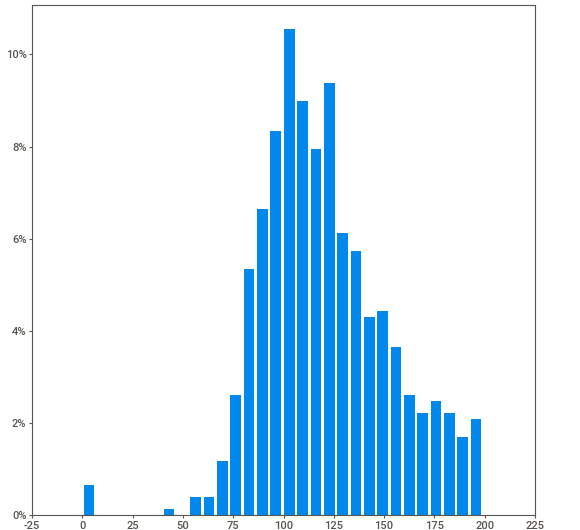
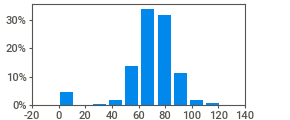
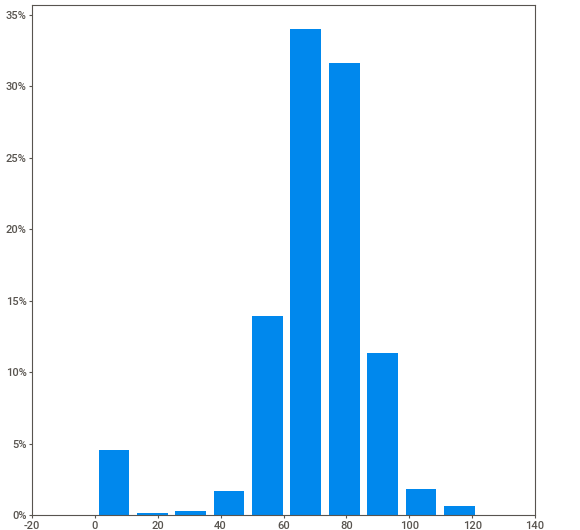
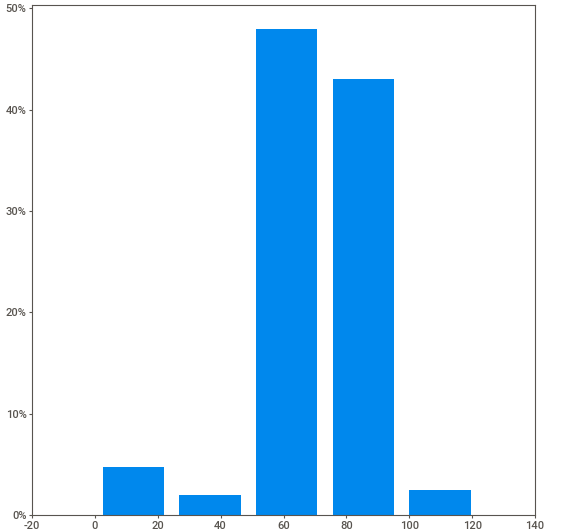
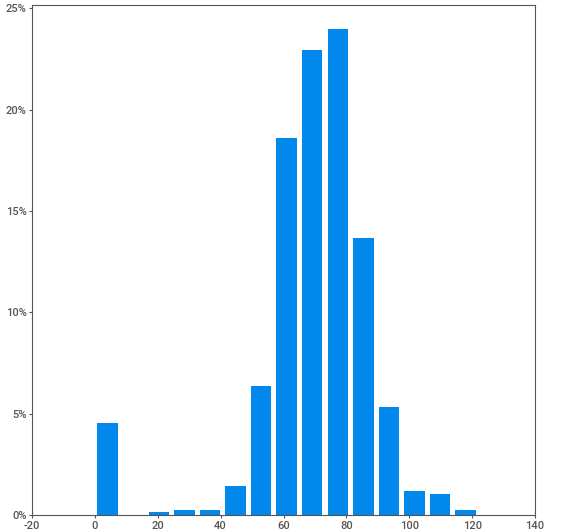
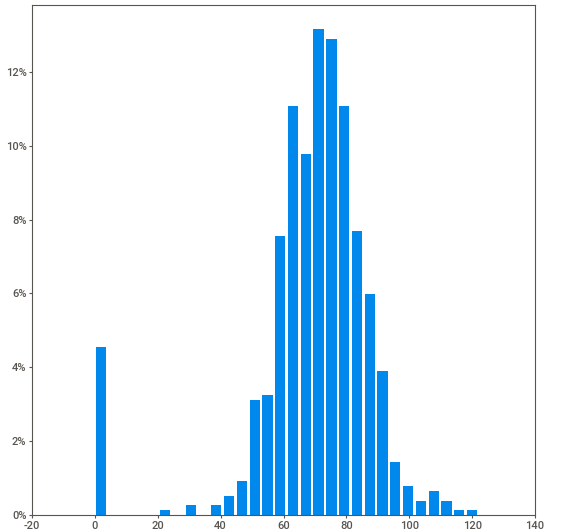
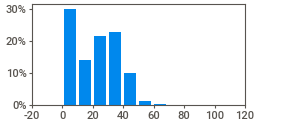
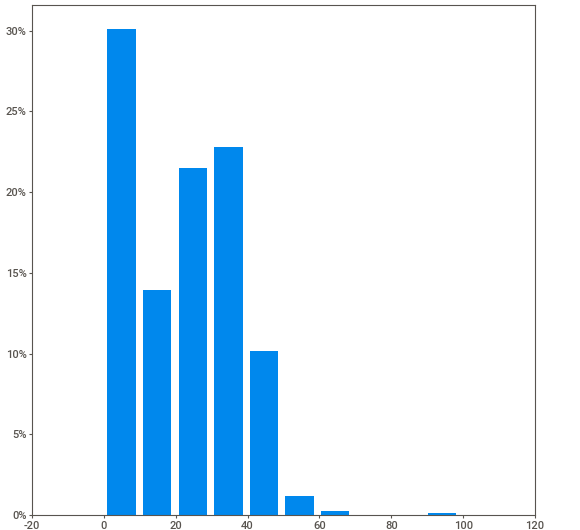
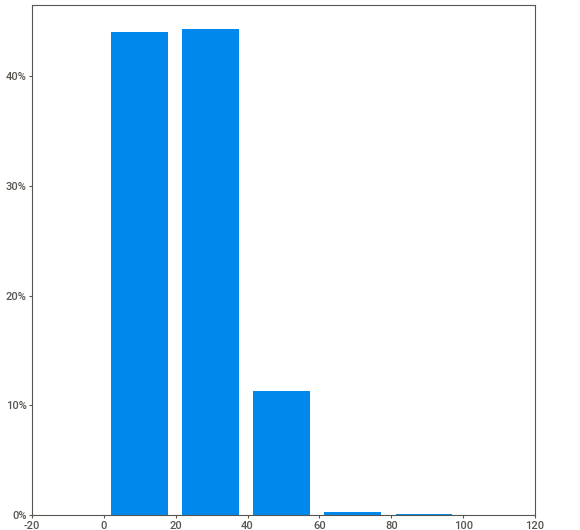
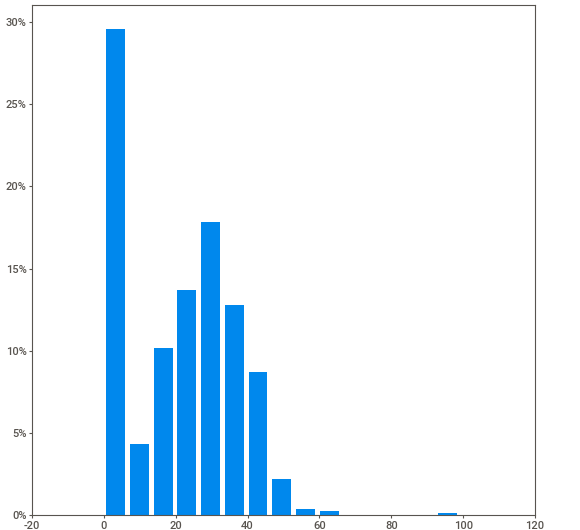
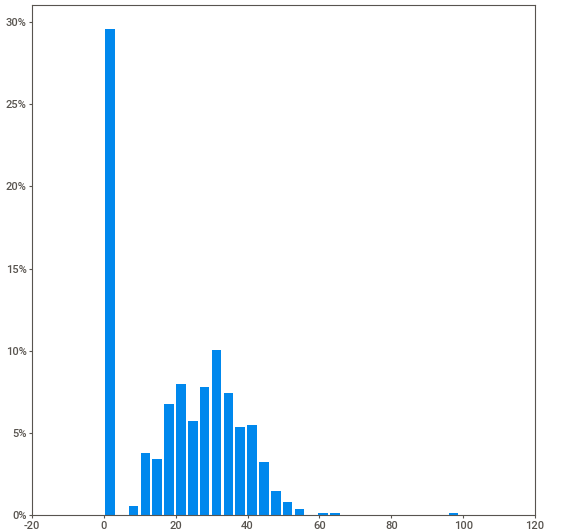
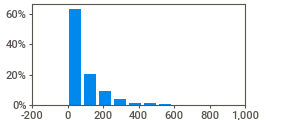
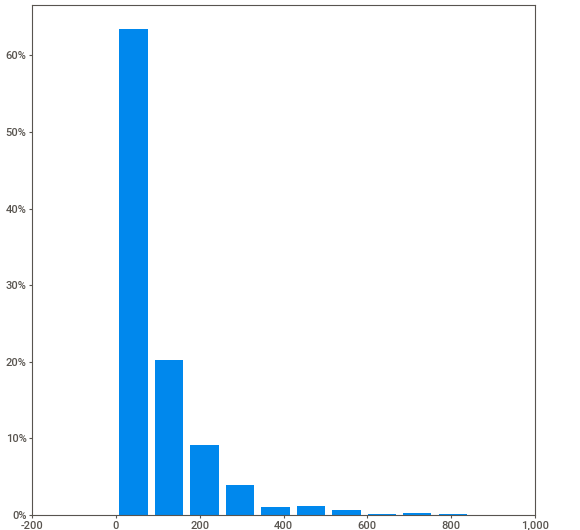
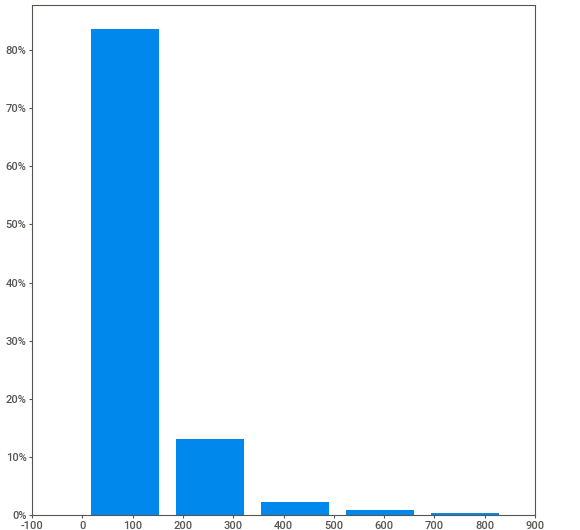
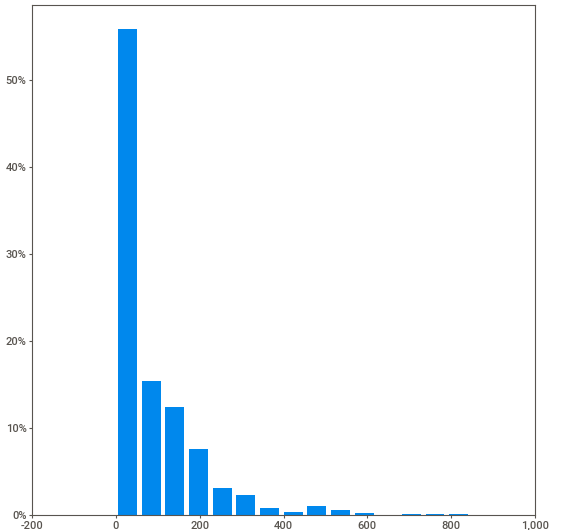
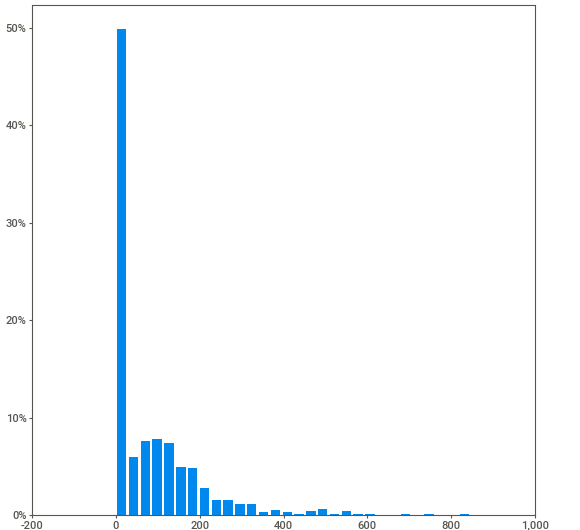
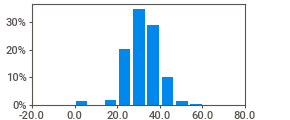
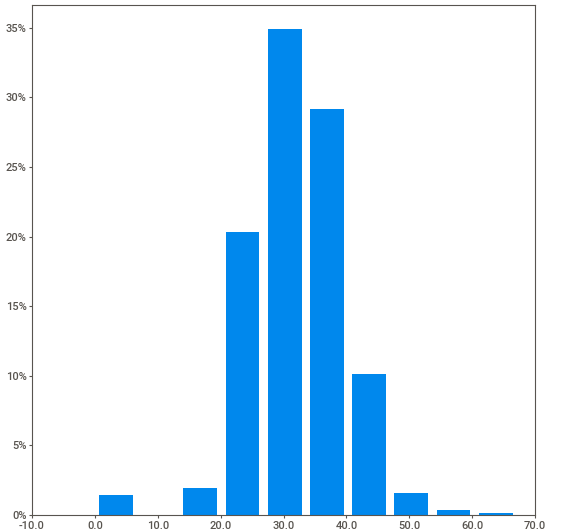
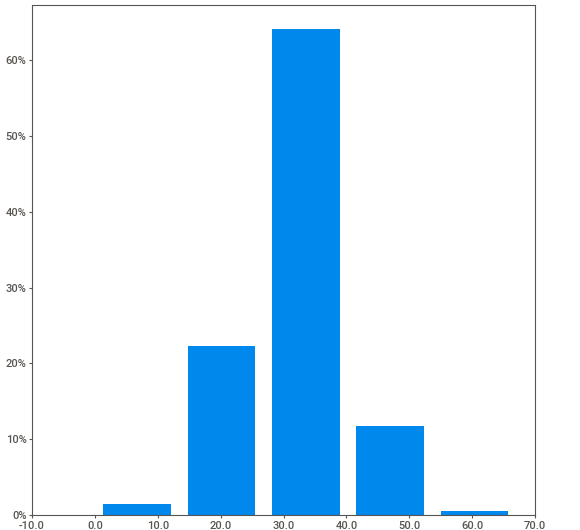
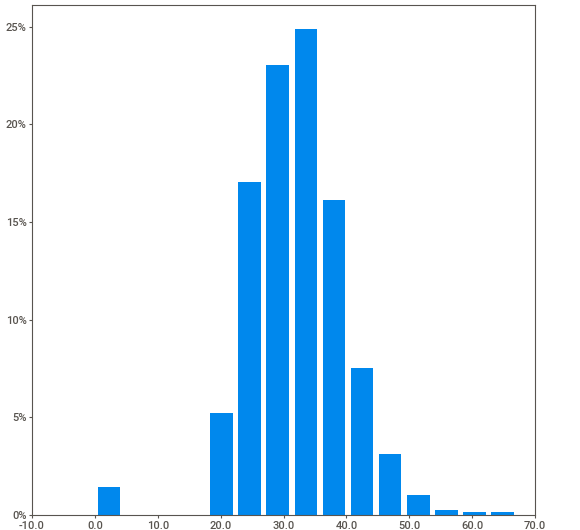
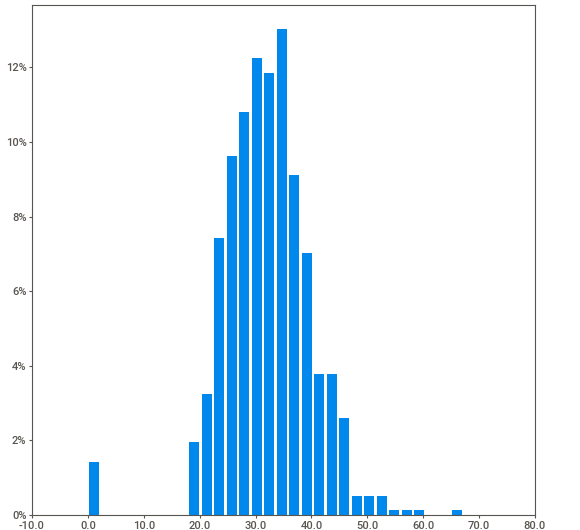
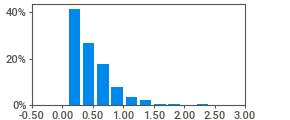
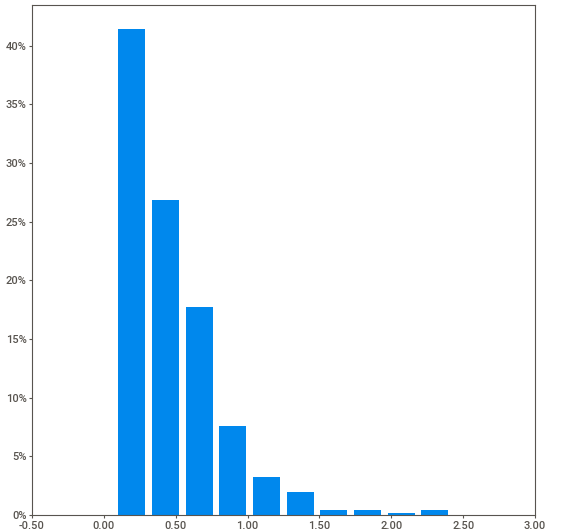
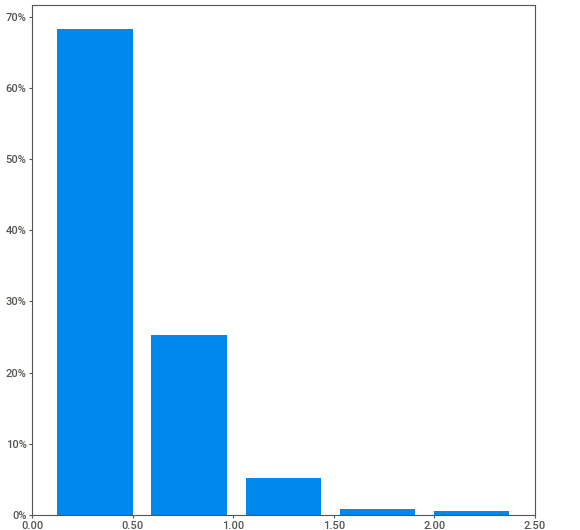
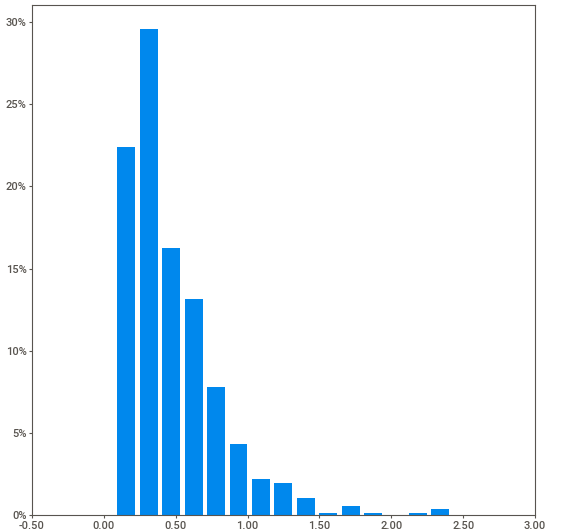
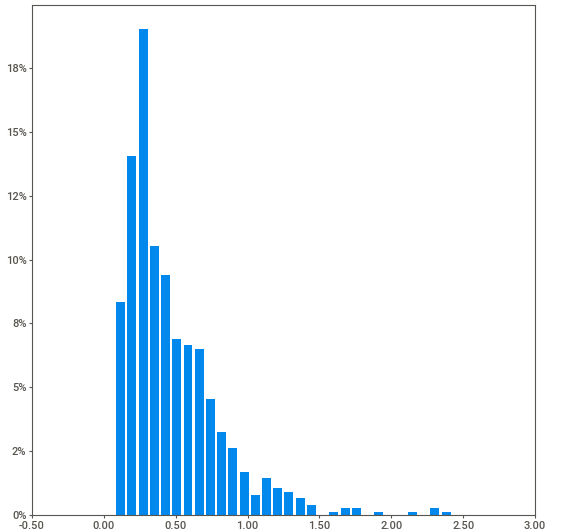
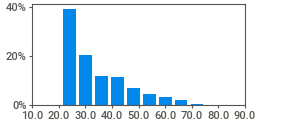
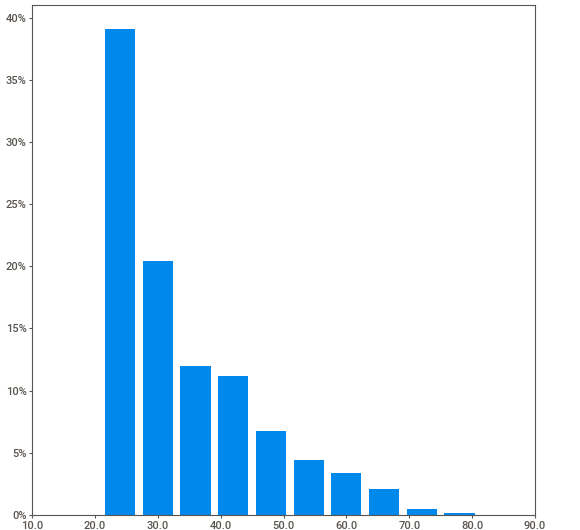
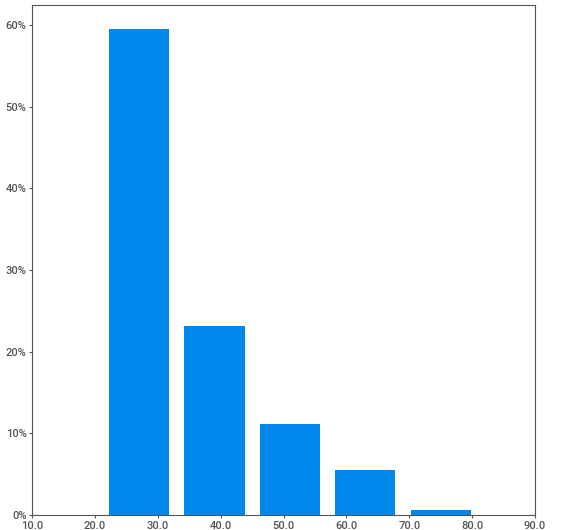
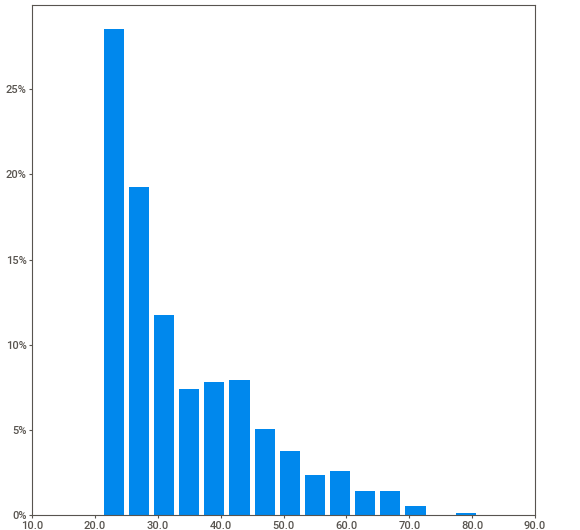
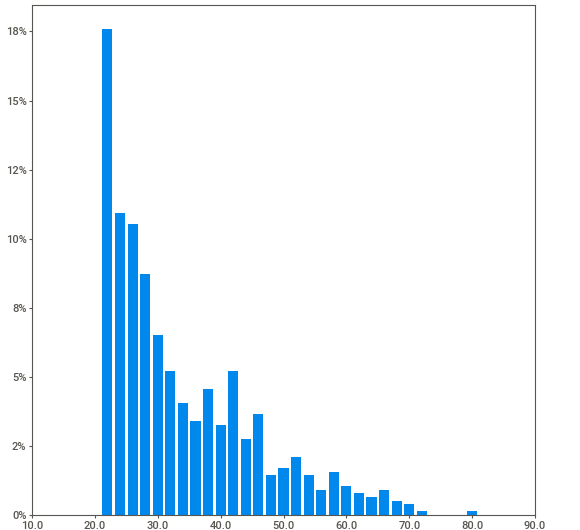
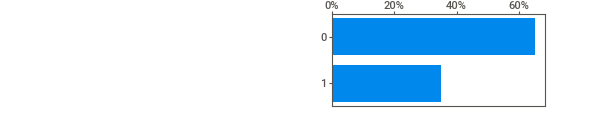
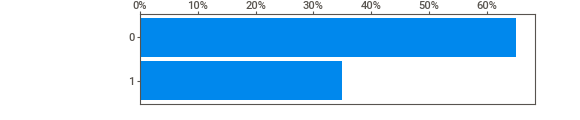
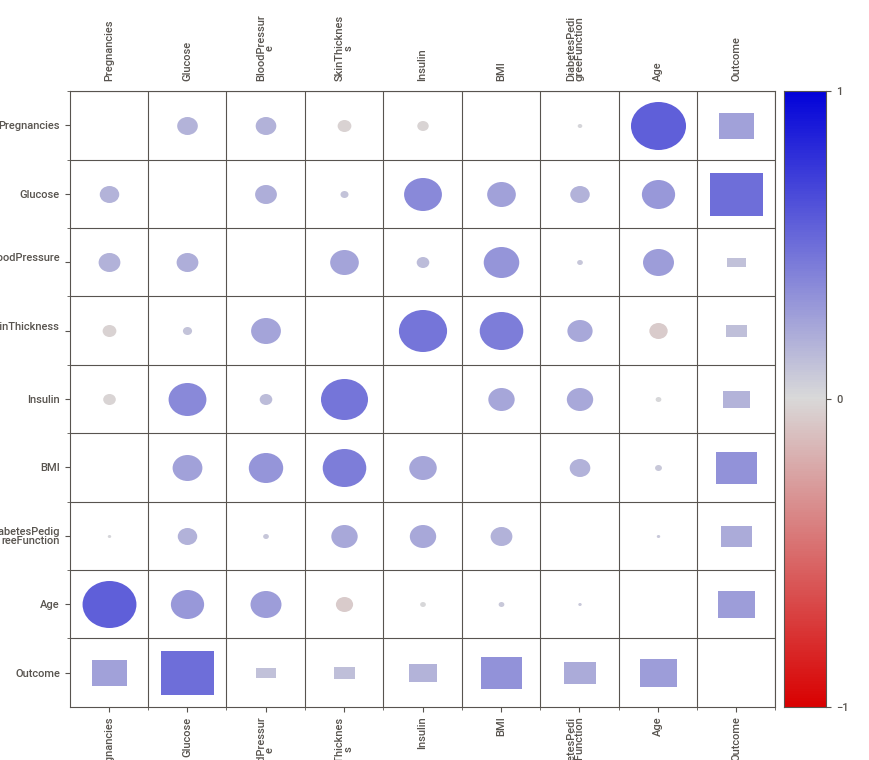
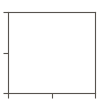

In [6]:
# sweetviz
Report = sv.analyze(df)

Report.show_notebook()

<Axes: >

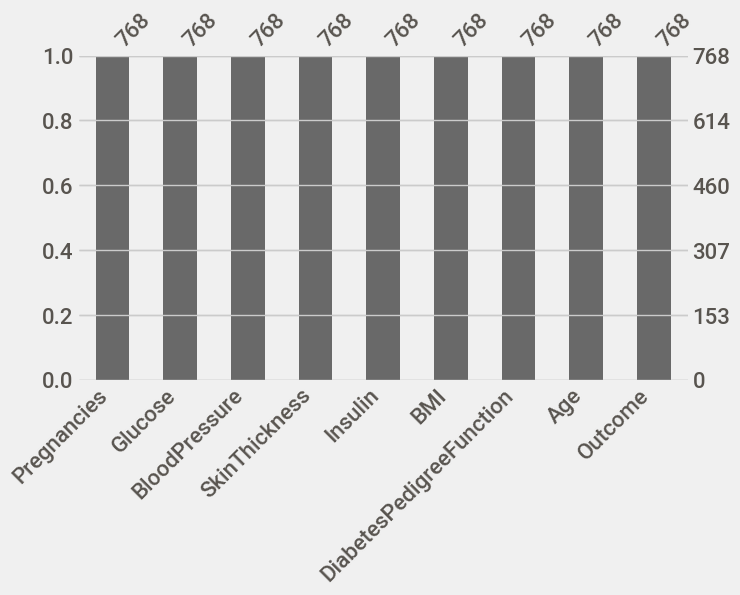

In [7]:
# check missing values
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(7,4))

msno.bar(df, ax=ax)

In [8]:
# detect outliers
def detect_outliers(data):
    """
    Detect outliers in each numeric column of the dataframe.
    Outliers are defined as values below Q1 - 1.5*IQR or above Q3 + 1.5*IQR.
    """
    for k, v in data.select_dtypes(include=[np.number]).items():
        # Calculate Q1, Q3, and IQR
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        iqr = q3 - q1
        # Identify outliers
        outliers = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
        perc = len(outliers) * 100.0 / len(data)
        # Print column summary
        print(f"Column: {k}")
        print(f"Min: {v.min()}, Max: {v.max()}")
        print(f"Outliers: {len(outliers)} ({perc:.2f}%)")
        if len(outliers) > 0:
            print("Outlier values:", outliers.values)
        print("-----")

# Example usage
detect_outliers(df)

Column: Pregnancies
Min: 0, Max: 17
Outliers: 4 (0.52%)
Outlier values: [15 17 14 14]
-----
Column: Glucose
Min: 0, Max: 199
Outliers: 5 (0.65%)
Outlier values: [0 0 0 0 0]
-----
Column: BloodPressure
Min: 0, Max: 122
Outliers: 45 (5.86%)
Outlier values: [  0   0  30 110   0   0   0   0 108 122  30   0 110   0   0   0   0   0
   0   0   0   0   0 108   0   0   0   0   0   0   0   0   0   0 110   0
  24   0   0   0   0 114   0   0   0]
-----
Column: SkinThickness
Min: 0, Max: 99
Outliers: 1 (0.13%)
Outlier values: [99]
-----
Column: Insulin
Min: 0, Max: 846
Outliers: 34 (4.43%)
Outlier values: [543 846 342 495 325 485 495 478 744 370 680 402 375 545 360 325 465 325
 415 579 474 328 480 326 330 600 321 440 540 480 335 387 392 510]
-----
Column: BMI
Min: 0.0, Max: 67.1
Outliers: 19 (2.47%)
Outlier values: [ 0.   0.   0.   0.  53.2 55.   0.  67.1 52.3 52.3 52.9  0.   0.  59.4
  0.   0.  57.3  0.   0. ]
-----
Column: DiabetesPedigreeFunction
Min: 0.078, Max: 2.42
Outliers: 29 (3.78%)
Outlie

In [9]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
# categorical outcome
df['Outcome_category'] = df['Outcome'].replace({0: 'No', 1: 'Yes'})

In [11]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Outcome_category
0,6,148,72,35,0,33.6,0.627,50,1,Yes
1,1,85,66,29,0,26.6,0.351,31,0,No
2,8,183,64,0,0,23.3,0.672,32,1,Yes
3,1,89,66,23,94,28.1,0.167,21,0,No
4,0,137,40,35,168,43.1,2.288,33,1,Yes


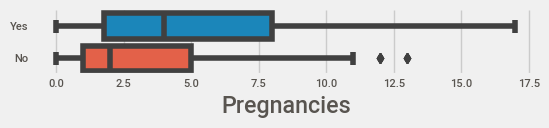

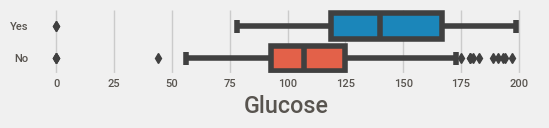

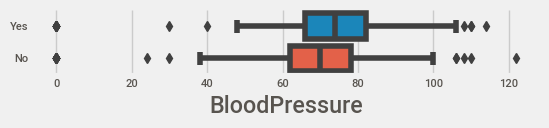

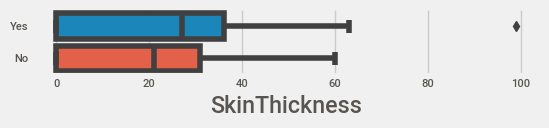

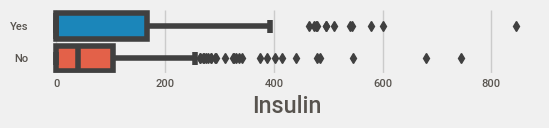

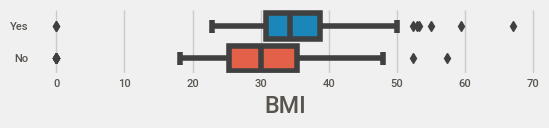

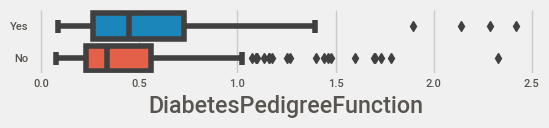

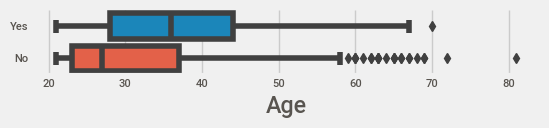

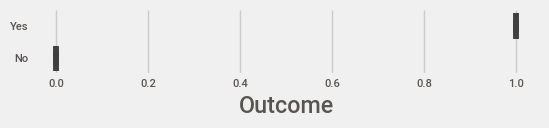

In [12]:
# outlier visual

def visual_outliers(df, cat_outcome):
    for col in df.select_dtypes(include=[np.number]):
        g = sns.catplot(
            data=df,
            x=col, y=cat_outcome,
            kind="box", orient="h",
            sharex=False, margin_titles=True,
            height=1.5, aspect=4,
        )
        g.set(xlabel="{}".format(col), ylabel="")

visual_outliers(df, "Outcome_category")

# Feature Engineering + Transformation

In [13]:
# custom function
def print_feature(df_agg, feature, xlim=None):
    fig, ax1 = plt.subplots(figsize=(12, 6))
    ax2 = ax1.twinx()

    if xlim is not None:
        df_agg = df_agg.iloc[xlim[0]:xlim[1] + 1]

    ax1.bar(list(df_agg.index), list(df_agg["count"]))
    ax2.plot(list(df_agg["mean_target"]), color='r', linewidth=3)

    ax1.grid(False)

    ax1.set_title(feature, fontsize=20)
    ax1.set_ylabel("Observations", fontsize=14)
    ax2.set_ylabel("Diabetes Rate (%)", fontsize=14)

    ax2.set_ylim(bottom=0)

    ax1.set_xticks(np.arange(len(df_agg.index)))
    labels = list(df_agg.index)
    ax1.axes.set_xticklabels(labels, rotation=45)

In [14]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, KBinsDiscretizer

# 1. Interaction Terms
df['Glucose_BMI'] = df['Glucose'] * df['BMI']


In [15]:
# check outcome
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Outcome_category,Glucose_BMI
0,6,148,72,35,0,33.6,0.627,50,1,Yes,4972.8
1,1,85,66,29,0,26.6,0.351,31,0,No,2261.0
2,8,183,64,0,0,23.3,0.672,32,1,Yes,4263.9
3,1,89,66,23,94,28.1,0.167,21,0,No,2500.9
4,0,137,40,35,168,43.1,2.288,33,1,Yes,5904.7


In [16]:
def categorize_bmi(bmi):
    """
    Categorizes the BMI value into different weight classes.
    """
    if bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi < 25:
        return "Normal weight"
    elif 25 <= bmi < 30:
        return "Overweight"
    else:
        return "Obesity"

df['BMI_Category'] = df['BMI'].apply(categorize_bmi)

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Outcome_category,Glucose_BMI,BMI_Category
0,6,148,72,35,0,33.6,0.627,50,1,Yes,4972.8,Obesity
1,1,85,66,29,0,26.6,0.351,31,0,No,2261.0,Overweight
2,8,183,64,0,0,23.3,0.672,32,1,Yes,4263.9,Normal weight
3,1,89,66,23,94,28.1,0.167,21,0,No,2500.9,Overweight
4,0,137,40,35,168,43.1,2.288,33,1,Yes,5904.7,Obesity


In [17]:
agg_df1 = df.groupby('BMI_Category').agg(count=("BMI_Category", "size"),
                                    mean_target=("Outcome", "mean")).reset_index()

agg_df1.head()

,BMI_Category,count,mean_target
0,Normal weight,102,0.068627
1,Obesity,472,0.463983
2,Overweight,179,0.223464
3,Underweight,15,0.133333


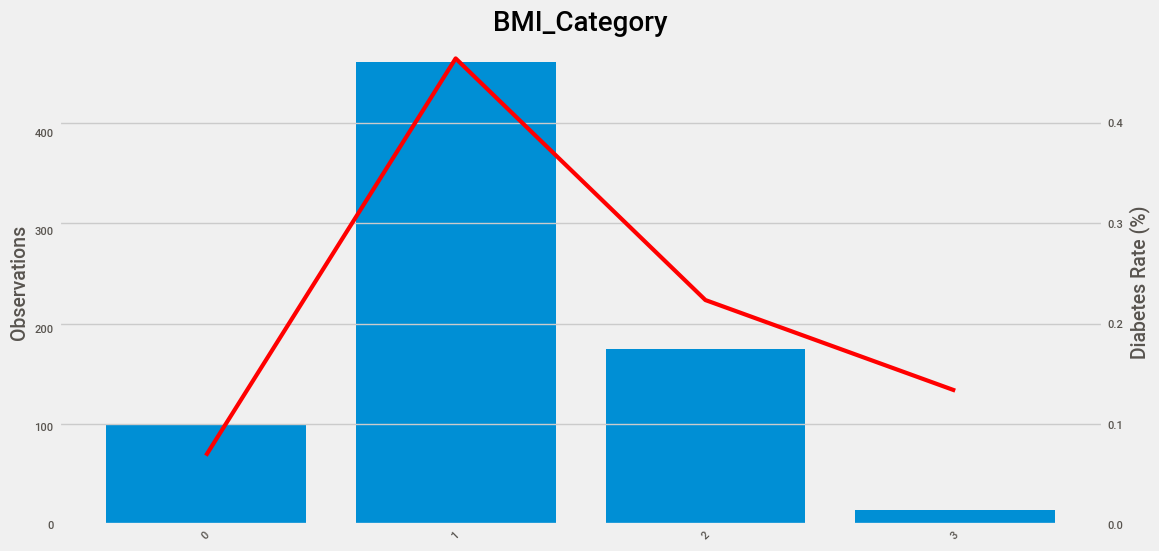

In [18]:
# visualise it
plt.style.use('fivethirtyeight')
print_feature(agg_df1, 'BMI_Category')

In [19]:
# how many rows do we have?
df.shape

(768, 12)

In [20]:
# Insulin per BMI
df['Insulin_per_BMI'] = df['Insulin'] / df['BMI']

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Outcome_category,Glucose_BMI,BMI_Category,Insulin_per_BMI
0,6,148,72,35,0,33.6,0.627,50,1,Yes,4972.8,Obesity,0.000000
1,1,85,66,29,0,26.6,0.351,31,0,No,2261.0,Overweight,0.000000
2,8,183,64,0,0,23.3,0.672,32,1,Yes,4263.9,Normal weight,0.000000
3,1,89,66,23,94,28.1,0.167,21,0,No,2500.9,Overweight,3.345196
4,0,137,40,35,168,43.1,2.288,33,1,Yes,5904.7,Obesity,3.897912


In [22]:
# train test split
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, random_state=1234,
                                     stratify=df['Outcome'])

print(df_train['Outcome'].value_counts(normalize=True))
print(df_test['Outcome'].value_counts(normalize=True))

0    0.651466
1    0.348534
Name: Outcome, dtype: float64
0    0.649351
1    0.350649
Name: Outcome, dtype: float64


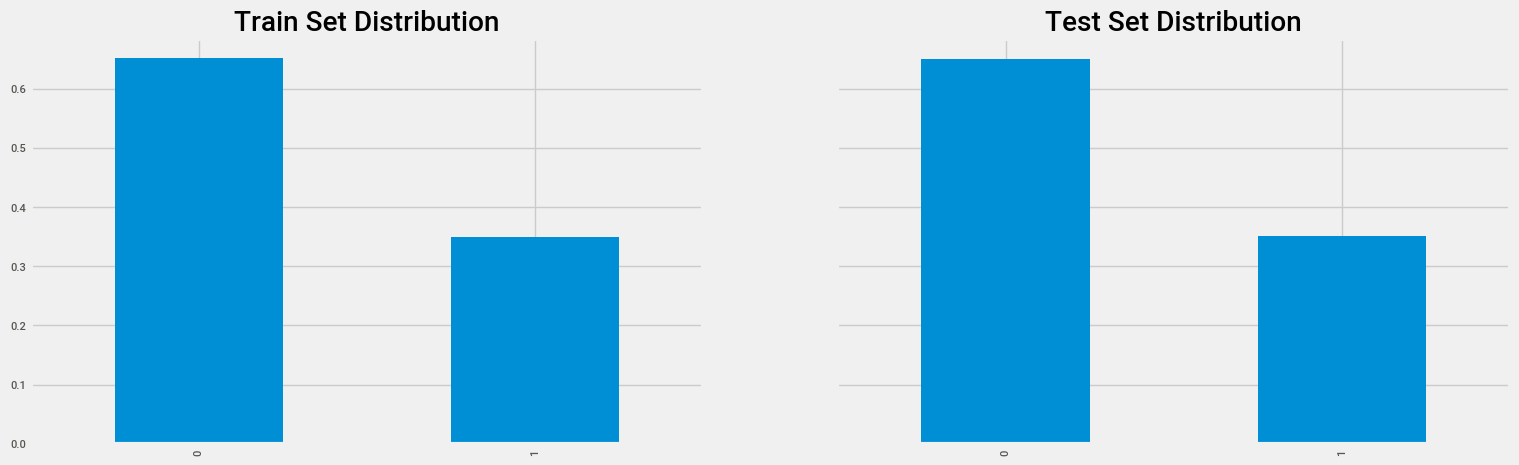

In [23]:
# verify the stratification

fig, axs = plt.subplots(ncols=2, figsize=(17, 5), sharey=True)
df_train['Outcome'].value_counts(normalize=True).plot(kind='bar', ax=axs[0])
axs[0].set_title("Train Set Distribution")

df_test['Outcome'].value_counts(normalize=True).plot(kind='bar', ax=axs[1])
axs[1].set_title('Test Set Distribution')
plt.show()

In [ ]:
df_train

In [ ]:
from scipy.cluster import hierarchy
fig, ax = plt.subplots(figsize=(10,8))
corr = df_train.corr()
# Perform hierarchical clustering to find the optimal ordering
corr_linkage = hierarchy.ward(corr)
dendro = hierarchy.dendrogram(corr_linkage, labels=corr.columns.tolist(), no_plot=True)
sort_order = dendro['leaves']

# Reorder the correlation matrix according to the clustering
sorted_corr = corr.iloc[sort_order, sort_order]

mask = np.triu(np.ones_like(sorted_corr, dtype=bool))

ax = sns.heatmap(sorted_corr, mask=mask, ax=ax, cmap='YlGnBu', annot=True)

# Predictive Modelling

In [ ]:
# classification report function

def classification_report_viz(model, X_train, X_test, y_train, y_test, classes):
    '''
    simple classification report from yellowbrick
    '''
    from sklearn.metrics import classification_report
    from sklearn.metrics import confusion_matrix
    # Instantiate the classification model and visualizer
    visualizer = ClassificationReport(model, classes=classes, support=True)

    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show()
    plt.clf()

In [ ]:
# confusion matrix plot
def visualize_classification(y_test, y_pred):
    """
    Visualizes the classification performance by displaying a classification report
    and a confusion matrix heatmap.
    """
    # Generate and print the classification report
    from sklearn.metrics import classification_report
    from sklearn.metrics import confusion_matrix
    cr = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(cr)
    # Generate the confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred.round())

    # Create the heatmap
    plt.figure(figsize=(10, 7))
    sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix Heatmap')
    plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

def plot_roc_cm(y_true, y_pred, model, name):
    # compute fpr and tpr for roc curve
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)

    # compute the confusion matrix
    y_pred_binary = np.where(y_pred > 0.5, 1, 0)
    mat = confusion_matrix(y_true, y_pred_binary)
    cr = classification_report(y_true, y_pred_binary)
    print(cr)

    # plot the ROC curve
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
    ax1.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(roc_auc))
    ax1.plot([0, 1], [0, 1], 'k--')
    ax1.set_xlabel('False Positive Rate')
    ax1.set_ylabel('True Positive Rate')
    ax1.set_title('ROC Curve of {}'.format(name))
    ax1.legend(loc='lower right')

    # plot the confusion matrix
    names = ["True Negative", "False Positive", "False Negative", "True Positive"]
    counts = ["{0:0.0f}".format(value) for value in mat.flatten()]
    percents = ["{0:.2%}".format(value) for value in mat.flatten()/np.sum(mat)]
    labels = ["{}\n{}\n{}".format(a, b, c) for a, b, c in zip(names, counts, percents)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(mat, annot=labels, fmt="", cmap="Blues", ax=ax2)
    ax2.set(xlabel="Predicted", ylabel="Actual",
       title='Confusion Matrix of {}'.format(name))

    plt.tight_layout()
    plt.show()

In [ ]:
# drop outcome category
df_train.drop('Outcome_category', axis=1, inplace=True)
df_test.drop('Outcome_category', axis=1, inplace=True)

In [ ]:
# categorical columns
df_train.head()

In [ ]:
# one-hot encoding
from sklearn.preprocessing import OneHotEncoder

def one_hot_encode_categorical(df_train, df_test, one_hot_cols):
    for col in one_hot_cols:
        ohe = OneHotEncoder(handle_unknown='ignore', sparse=False, drop='first').fit(df_train[[col]])
        ohe_cols_train = pd.DataFrame(ohe.transform(df_train[[col]]),
                                       columns=[f"{col}_{cat}" for cat in ohe.categories_[0][1:]],
                                      index=df_train.index)
        ohe_cols_test = pd.DataFrame(ohe.transform(df_test[[col]]),
                                      columns=[f"{col}_{cat}" for cat in ohe.categories_[0][1:]],
                                     index=df_test.index)
        df_train = pd.concat([df_train, ohe_cols_train], axis=1).drop(columns=col)
        df_test = pd.concat([df_test, ohe_cols_test], axis=1).drop(columns=col)
    return df_train, df_test

In [ ]:
# apply

one_hot_cols = ['BMI_Category']

df_train, df_test = one_hot_encode_categorical(df_train, df_test, one_hot_cols)

In [ ]:
df_train

In [ ]:
# feature importance plot

def feat_importance(df, target):
    '''
    Feature importance plot function
    '''
    if isinstance(df, pd.DataFrame):
        X = df.drop([target, 'Insulin_per_BMI'], axis=1).fillna(0)
        y = df[target]
        from sklearn.ensemble import RandomForestClassifier
        forest = RandomForestClassifier(n_estimators=5, max_depth=6, min_samples_leaf=6,
                                min_samples_split=10, random_state=42)
        forest.fit(X,y)
        # visualize
        sns.set()
        plt.figure(figsize=(10,8))
        importances = pd.Series(forest.feature_importances_, index=X.columns)
        importances.nlargest(10).sort_values().plot(kind='barh')
        plt.title('RF Feature Importance Plot', fontsize=16)
        plt.xlabel('Importance')
        plt.show()
    else:
        print('pd.DataFrame object needed')

In [ ]:
# which columns do we need to drop?
feat_importance(df_train, 'Outcome')

In [ ]:
df_train.columns

In [ ]:
# split
cols_to_drop = ['Outcome','BMI_Category_Obesity', 'BMI_Category_Overweight',
       'BMI_Category_Underweight', 'Insulin_per_BMI']

X_train = df_train.drop(cols_to_drop, axis=1)
X_test = df_test.drop(cols_to_drop, axis=1)

y_train = df_train['Outcome']
y_test = df_test['Outcome']

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
# scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from lazypredict.Supervised import LazyClassifier

# load the lazyclassifier engine - specify settings
classifier = LazyClassifier(verbose=0, ignore_warnings=True,
                     custom_metric=None, predictions=True)

# run the lazyclassifier engine
models, predictions = classifier.fit(X_train, X_test, y_train, y_test)


In [ ]:
models.sort_values(by=['F1 Score','Balanced Accuracy'], ascending=False, axis=0)

In [ ]:
# train logistic regression
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as met

# step 1: initialise the model
model = LogisticRegression() # you can add in class_weight='balanced' here 

# step 2: train the model
model.fit(X_train_scaled, y_train)

# step 3: generate y_pred
y_pred = model.predict(X_test_scaled)

accuracy = met.accuracy_score(y_test, y_pred)
balanced_accuracy = met.balanced_accuracy_score(y_test, y_pred)
f1 = met.f1_score(y_test, y_pred)

print("Accuracy:", np.round(accuracy*100.0,1))
print("Balanced Accuracy:", np.round(balanced_accuracy*100.0,2))
print("F1-score: ", np.round(f1*100.0,2))

In [ ]:
# train the model and evaluate it
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as met

# step 1: initialise the model
model = RandomForestClassifier(n_estimators=500, max_depth=3)

# step 2: train the model
model.fit(X_train_scaled, y_train)

# step 3: generate y_pred
y_pred = model.predict(X_test_scaled)

accuracy = met.accuracy_score(y_test, y_pred)
balanced_accuracy = met.balanced_accuracy_score(y_test, y_pred)
f1 = met.f1_score(y_test, y_pred)

print("Accuracy:", np.round(accuracy*100.0,1))
print("Balanced Accuracy:", np.round(balanced_accuracy*100.0,2))
print("F1-score: ", np.round(f1*100.0,2))

In [ ]:
# a fancy confusion matrix with labels
plot_roc_cm(y_test, y_pred, model, 'Random Forest Classifier')

# Model Interpretation

In [ ]:
!pip install shap

In [ ]:
X_train.columns

In [ ]:
# example of SHAP
import shap

from sklearn import tree

dtree = tree.DecisionTreeRegressor(min_samples_split=20)
dtree.fit(X_train, y_train)

# explain all the predictions in the test set
ex = shap.TreeExplainer(dtree)
shap_values = ex.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [ ]:
# what are the feature numbers
features = X_train.columns

for i, name, in enumerate(features):
    print(i, name)

In [ ]:
# example of SHAP
import shap

ex = shap.Explainer(model, X_train_scaled)

# we calculate SHAP values for the test set
shap_values = ex.shap_values(X_test_scaled)

shap.summary_plot(shap_values, X_test_scaled)